In [78]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Read the CSV file into a DataFrame
df = pd.read_csv('IIoT_Smart_Parking_Management.csv')
#df.info()
# Display the first 5 rows
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

#print(df.head().to_markdown(index=False, numalign="left", stralign="left"))
df['Year']         = df['Timestamp'].dt.year
df['Month']        = df['Timestamp'].dt.month
df['Date']         = df['Timestamp'].dt.day        # Day of the month
df['Day_of_Week']  = df['Timestamp'].dt.day_name()  # e.g., Monday, Tuesday, etc.
df['Hour']         = df['Timestamp'].dt.hour
# Print the column names and their data types


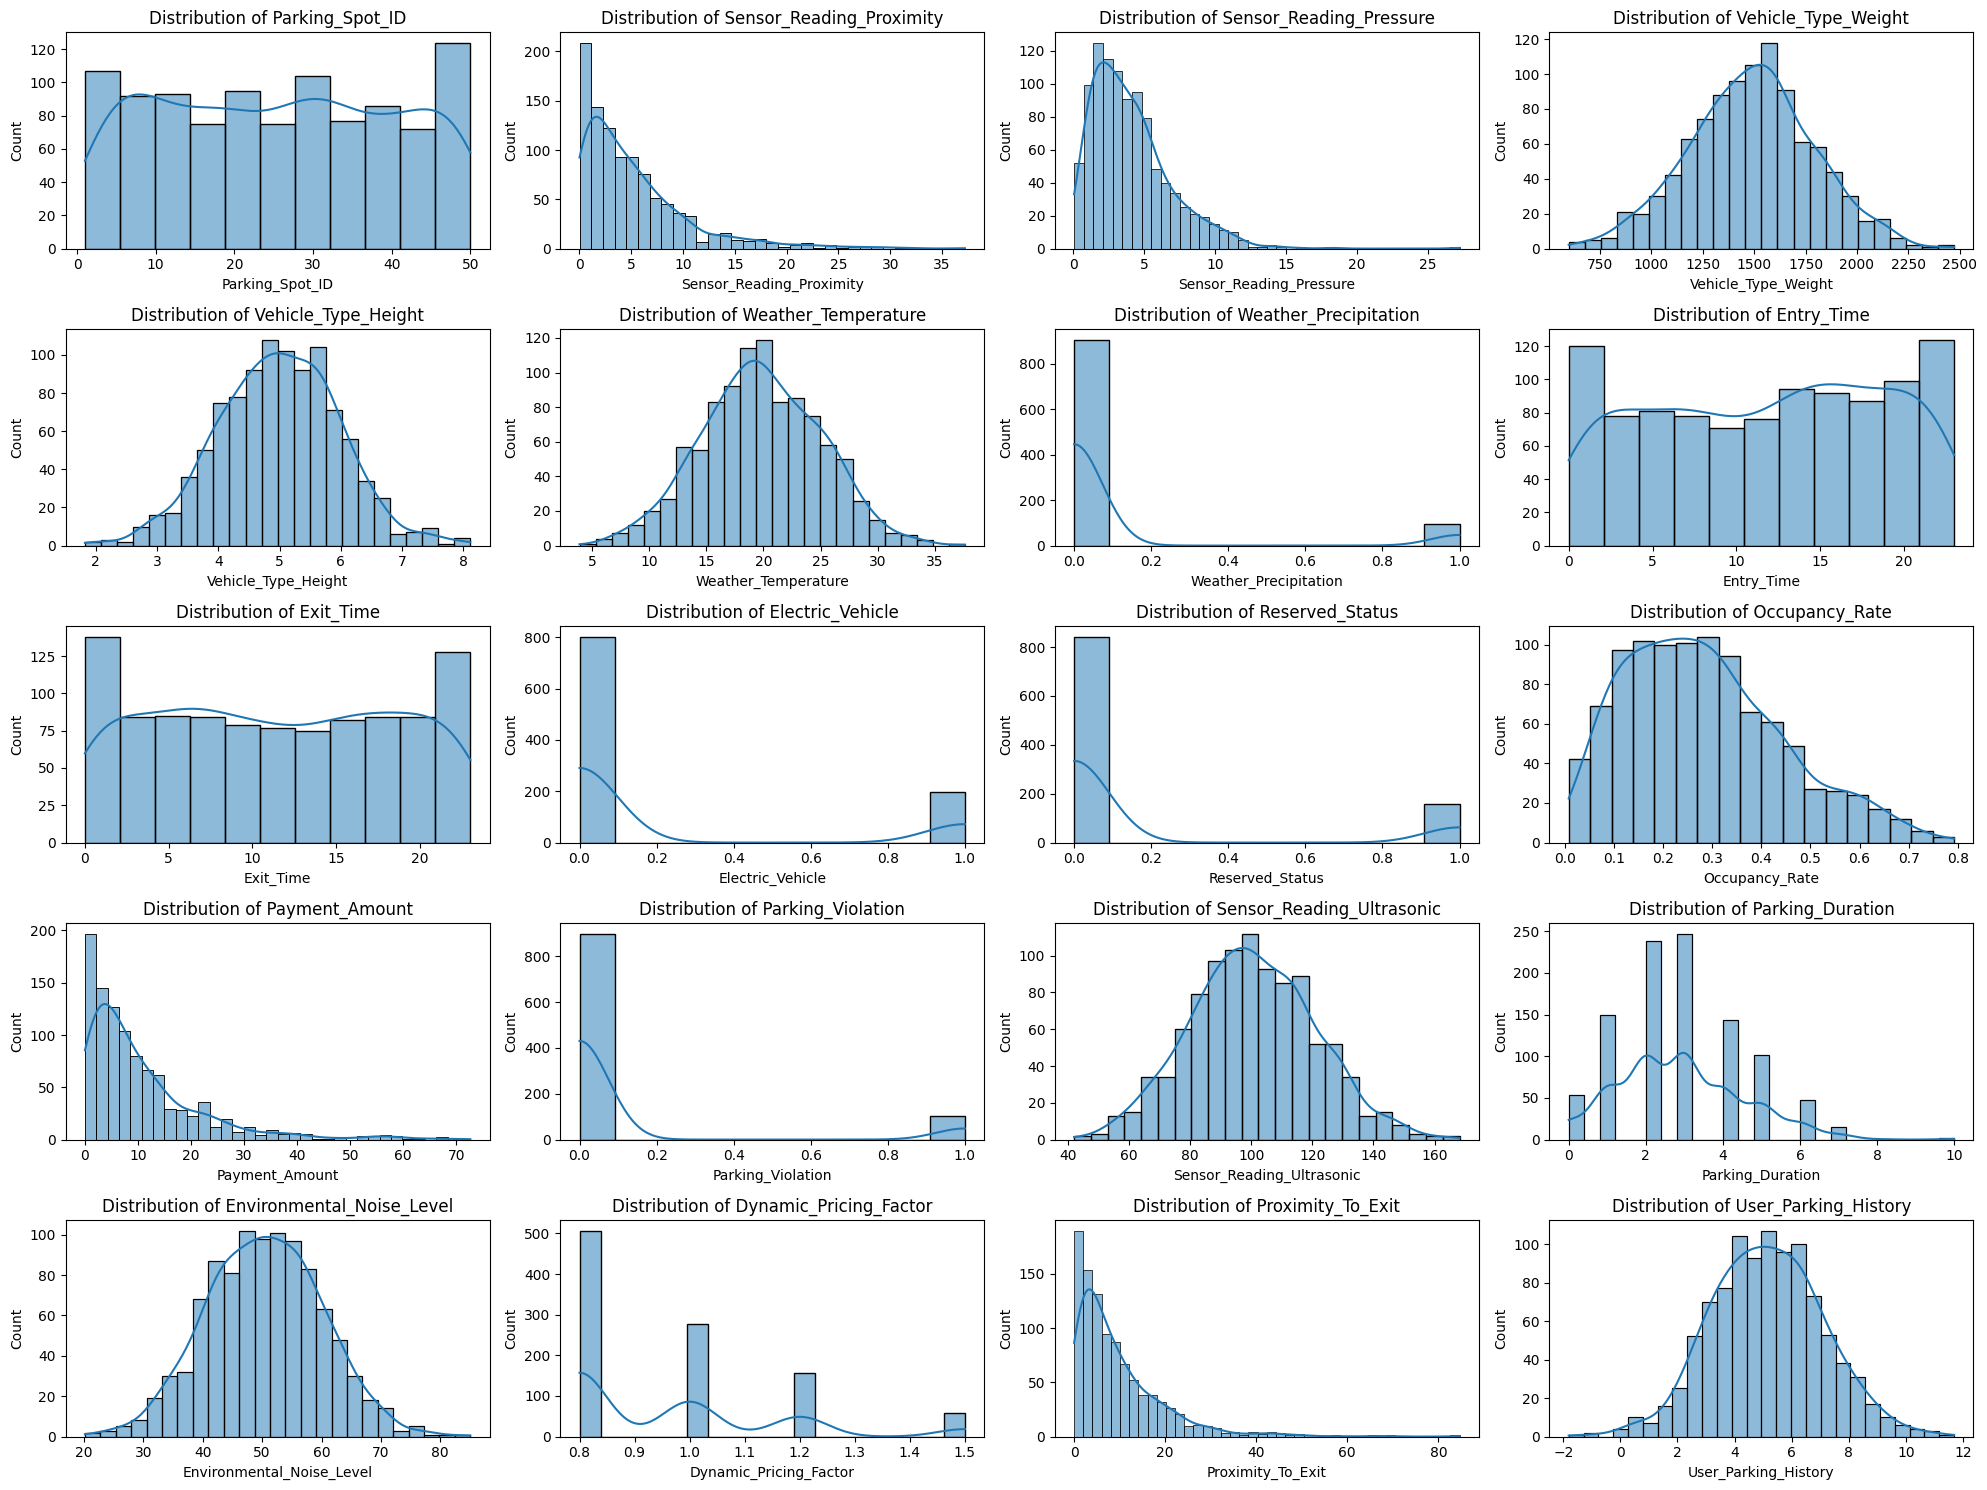

Index(['User_Type', 'Nearby_Traffic_Level', 'Parking_Lot_Section',
       'Payment_Status', 'Occupancy_Status', 'Vehicle_Type', 'Spot_Size',
       'Day_of_Week'],
      dtype='object')


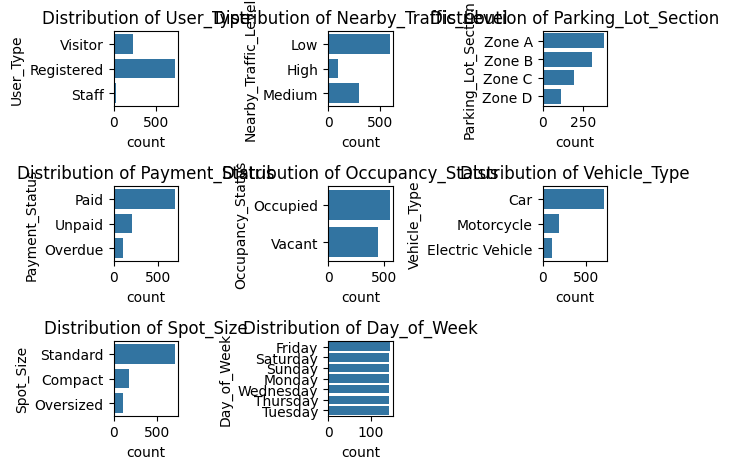

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the plots
plt.figure(figsize=(20, 15))

# Get numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for numerical columns
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 4, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Calculate the correlation matrix
#corr_matrix = df.corr()

# Plot the heatmap
#plt.figure(figsize=(20, 15))
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
#plt.title('Correlation Matrix')
#plt.show()

# Get categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)
# Plot bar plots for categorical columns
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(y=df[col])
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [66]:
from pandasql import sqldf

#query = "SELECT count(*) as total ,  Hour ,Parking_Spot_ID,Day_of_Week FROM df group by Hour ,Parking_Spot_ID,Day_of_Week "
query = "SELECT count(*) as total ,  Hour ,Parking_Spot_ID  FROM df group by Hour ,Parking_Spot_ID  order by total desc"

# Execute the query using pandasql
result_df = sqldf(query)

# Display the result
print(result_df.head().to_markdown(index=False, numalign="left", stralign="left"))

| total   | Hour   | Parking_Spot_ID   |
|:--------|:-------|:------------------|
| 5       | 22     | 33                |
| 4       | 1      | 40                |
| 4       | 5      | 42                |
| 4       | 6      | 26                |
| 4       | 6      | 36                |


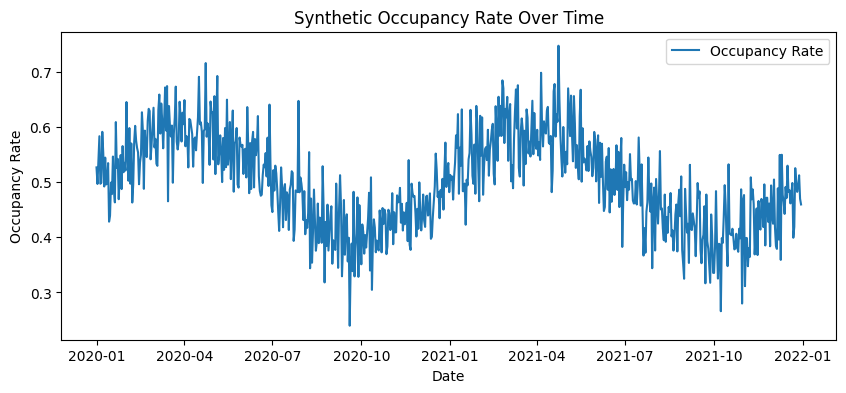

In [84]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Create a date range for 2 years of daily data
date_range = pd.date_range(start='2020-01-01', periods=730, freq='D')

# Generate synthetic occupancy rates with a seasonal (sine wave) pattern and some noise
occupancy_rate = 0.5 + 0.1 * np.sin(2 * np.pi * date_range.dayofyear / 365) + 0.05 * np.random.randn(len(date_range))
occupancy_rate = np.clip(occupancy_rate, 0, 1)  # Keep rates between 0 and 1

# Create a DataFrame in Prophet's expected format:
#   - 'ds' column for datestamps
#   - 'y' column for the metric (occupancy rate)
df = pd.DataFrame({'ds': date_range, 'y': occupancy_rate})

# Plot the synthetic data
plt.figure(figsize=(10, 4))
plt.plot(df['ds'], df['y'], label='Occupancy Rate')
plt.title('Synthetic Occupancy Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Occupancy Rate')
plt.legend()
plt.show()

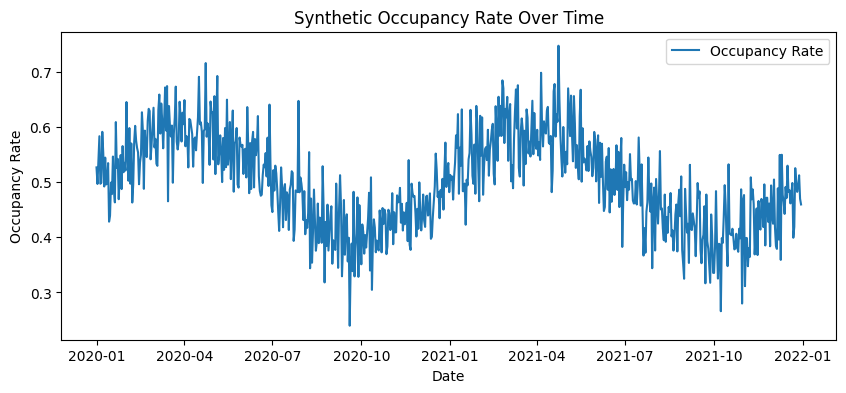

X shape: (700, 30) y shape: (700,)


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2771 - val_loss: 0.0228
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0253 - val_loss: 0.0106
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0166 - val_loss: 0.0146
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0129 - val_loss: 0.0111
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0121 - val_loss: 0.0129
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0119 - val_loss: 0.0116
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0106 - val_loss: 0.0114
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0108 - val_loss: 0.0120
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0111 - val_loss: 0.0113
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0106 - val_loss: 0.0110
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0099 - val_loss: 0.0112
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0113 - val_lo

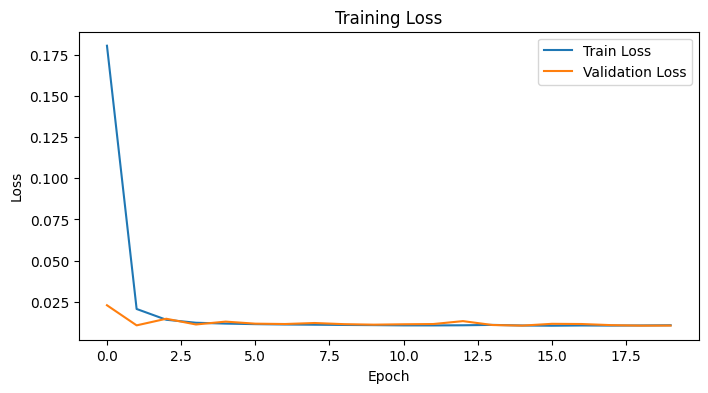

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


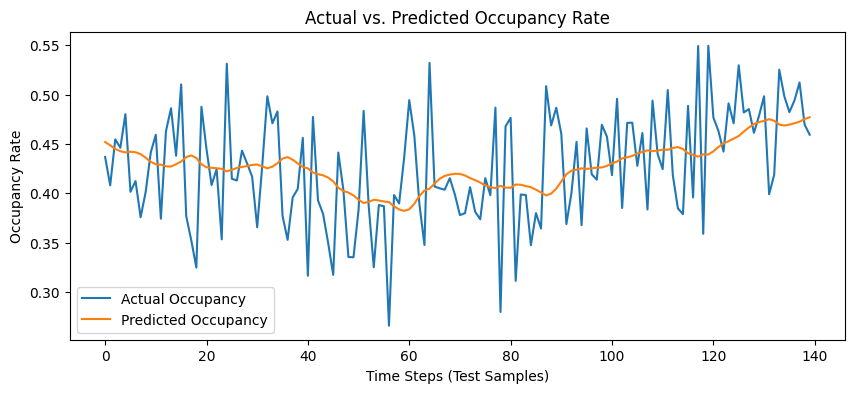

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# --- Step 1: Generate Synthetic Occupancy Data ---
np.random.seed(42)
# Create a date range for 2 years of daily data (730 days)
date_range = pd.date_range(start='2020-01-01', periods=730, freq='D')

# Generate occupancy rates with seasonality (sine wave) plus random noise
occupancy_rate = 0.5 + 0.1 * np.sin(2 * np.pi * date_range.dayofyear / 365) + 0.05 * np.random.randn(len(date_range))
occupancy_rate = np.clip(occupancy_rate, 0, 1)  # Ensure values are between 0 and 1

# Build DataFrame in time series format
df = pd.DataFrame({'ds': date_range, 'Occupancy_Rate': occupancy_rate})

# Plot the synthetic occupancy data
plt.figure(figsize=(10, 4))
plt.plot(df['ds'], df['Occupancy_Rate'], label='Occupancy Rate')
plt.xlabel('Date')
plt.ylabel('Occupancy Rate')
plt.title('Synthetic Occupancy Rate Over Time')
plt.legend()
plt.show()

# --- Step 2: Preprocess the Data ---
# Scale the Occupancy_Rate to a [0, 1] range (already mostly between 0 and 1 but scaling is a standard step)
scaler = MinMaxScaler(feature_range=(0, 1))
df['Occupancy_Rate'] = scaler.fit_transform(df[['Occupancy_Rate']])

# Function to create sequences (sliding windows)
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i : i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 30  # Using the past 30 days to predict the next day's occupancy
data = df['Occupancy_Rate'].values
X, y = create_sequences(data, window_size)
print("X shape:", X.shape, "y shape:", y.shape)  # Expect (samples, 30) and (samples,)

# Reshape X for LSTM input: [samples, timesteps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split into training and testing sets (e.g., 80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# --- Step 3: Build and Train the LSTM Model ---
model = Sequential()
model.add(LSTM(50, input_shape=(window_size, 1)))  # 50 LSTM units
model.add(Dense(1))  # Single output (next day's occupancy rate)

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

# Plot training loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# --- Step 4: Evaluate the Model ---
# Predict on the test set
predictions = model.predict(X_test)

# Inverse transform the predictions and true values (if needed)
predictions_inv = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the actual vs. predicted occupancy rates
plt.figure(figsize=(10, 4))
plt.plot(y_test_inv, label='Actual Occupancy')
plt.plot(predictions_inv, label='Predicted Occupancy')
plt.xlabel('Time Steps (Test Samples)')
plt.ylabel('Occupancy Rate')
plt.title("Actual vs. Predicted Occupancy Rate")
plt.legend()
plt.show()


In [90]:
last_sequence = data[-window_size:]  # shape: (30,)
# Reshape it to match LSTM input shape: (1, window_size, 1)
last_sequence = last_sequence.reshape(1, window_size, 1)

# Prepare a list to store predictions for the next 2 days
future_predictions = []

# Iterate for 2 days
num_days_to_predict = 2
for i in range(num_days_to_predict):
    # Predict the next day's occupancy (scaled)
    next_day_pred_scaled = model.predict(last_sequence)  # shape: (1, 1)

    # Save the prediction (still scaled)
    future_predictions.append(next_day_pred_scaled[0, 0])

    # 1) Remove the first time step from the window: last_sequence[:, 1:, :] => shape (1, window_size-1, 1)
    # 2) Reshape the predicted value to (1, 1, 1)
    next_value = np.array([[[next_day_pred_scaled[0, 0]]]])  # shape (1,1,1)

    # 3) Append along axis=1 so final shape is (1, window_size, 1)
    last_sequence = np.append(last_sequence[:, 1:, :], next_value, axis=1)

# Convert predictions back to the original scale
future_predictions = np.array(future_predictions).reshape(-1, 1)
future_predictions_original = scaler.inverse_transform(future_predictions)

print("Predicted occupancy rates for the next 2 days:")
print(future_predictions_original)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicted occupancy rates for the next 2 days:
[[0.47728112]
 [0.4771555 ]]


In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE
mae = mean_absolute_error(y_test_inv, predictions_inv)

# Calculate MSE and then RMSE
mse = mean_squared_error(y_test_inv, predictions_inv)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 0.04189616545229777
RMSE: 0.052634789195838666
